# Import the Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

#Load dataset

In [2]:
train_df = pd.read_csv("/content/train (1).csv")

#preprocessing

In [3]:
train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})
train_df['Embarked'] = train_df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
train_df['Embarked'].fillna(0, inplace=True)
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
train_df['Fare'].fillna(train_df['Fare'].median(), inplace=True)

<ipython-input-3-3d6f6d83e981>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Embarked'].fillna(0, inplace=True)
<ipython-input-3-3d6f6d83e981>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.

# Feature Selection

In [4]:
features = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked']
X = train_df[features]
y = train_df['Survived']

#Feature Scaling

Feature scaling ensures that all features contribute equally, allowing SVM to find a balanced decision boundary.

In [23]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#training and test sets

In [24]:
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#training SVM model

In [25]:
model = SVC(kernel='rbf', C=1, gamma='scale')
model.fit(X_train, y_train)

SVC(C=1)

#predict and evaluate

In [26]:
y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print("SVM Model Accuracy:", round(accuracy * 100, 2), "%")

SVM Model Accuracy: 80.45 %


#Visualizing the SVM model

<ipython-input-21-4608d0d35097>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_vis['Age'].fillna(X_vis['Age'].median(), inplace=True)
<ipython-input-21-4608d0d35097>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

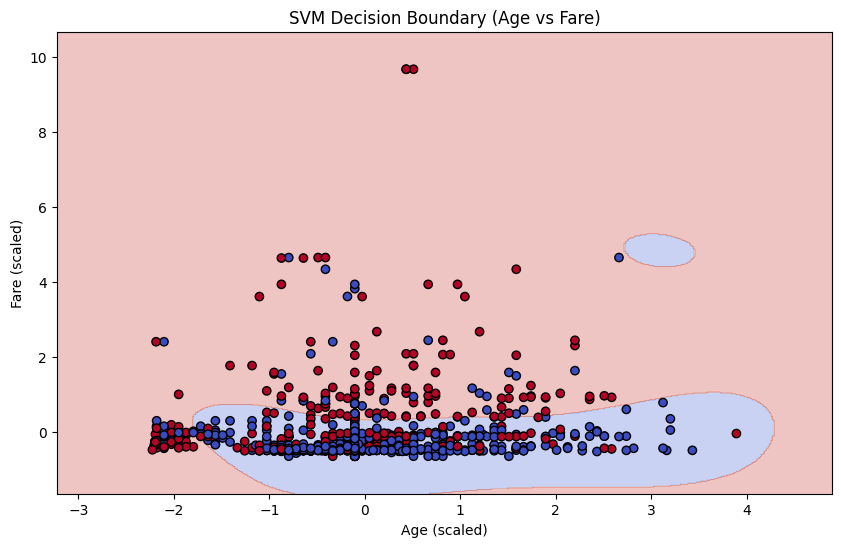

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Select only two features for visualization
X_vis = train_df[['Age', 'Fare']].copy()
y_vis = train_df['Survived'].copy()

# Fill missing values
X_vis['Age'].fillna(X_vis['Age'].median(), inplace=True)
X_vis['Fare'].fillna(X_vis['Fare'].median(), inplace=True)

# Scale the two features (use separate scaler so you don't overwrite the original)
vis_scaler = StandardScaler()
X_scaled_vis = vis_scaler.fit_transform(X_vis)

# Train SVM for visualization only
svm_vis = SVC(kernel='rbf', C=1, gamma='scale')
svm_vis.fit(X_scaled_vis, y_vis)

# Create meshgrid for decision boundary
x_min, x_max = X_scaled_vis[:, 0].min() - 1, X_scaled_vis[:, 0].max() + 1
y_min, y_max = X_scaled_vis[:, 1].min() - 1, X_scaled_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = svm_vis.predict(grid).reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_scaled_vis[:, 0], X_scaled_vis[:, 1], c=y_vis, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel("Age (scaled)")
plt.ylabel("Fare (scaled)")
plt.title("SVM Decision Boundary (Age vs Fare)")
plt.show()


#predicting on the test set

In [27]:
#Loading the test data
test_df = pd.read_csv("/content/test (1).csv")

#Preprocess
test_df['Sex'] = test_df['Sex'].map({'male': 0, 'female': 1})
test_df['Embarked'] = test_df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
test_df['Embarked'] = test_df['Embarked'].fillna(0)
test_df['Age'] = test_df['Age'].fillna(train_df['Age'].median())
test_df['Fare'] = test_df['Fare'].fillna(train_df['Fare'].median())

#features used during training
features = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked']
X_test = test_df[features]

#Scaling
X_test_scaled = scaler.transform(X_test.values)

#Predict using the trained SVM model
test_preds = model.predict(X_test_scaled)

#Create submission DataFrame
submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': test_preds
})

#Save to CSV
submission.to_csv("svm_submission.csv", index=False)
print("✅ SVM submission file saved as 'svm_submission.csv'")


✅ SVM submission file saved as 'svm_submission.csv'


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
